In [1]:
%%time
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data set csv
df = pd.read_csv("./dataset/Social Science F.csv")
# df.set_index('NO ABSEN', inplace=True)
df

CPU times: user 568 ms, sys: 120 ms, total: 687 ms
Wall time: 716 ms


,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/11/2023 21:07:43,dewaanom712@gmail.com,Dewa Gede Anom Rahmadi,1,VIIF,Dewa Gede Rama Carmandana,Karena baik,I Gusti Ngurah Ito Wikma,Karena baik,I Putu Adi Satria Sugara,Karena suka mencari masalah,I Putu Adi Satria Sugara,"Karena suka mencari masalah Sama teman"""
1,5/11/2023 8:52:17,bintanggek239@gmail.com,Dewa Gede Rama Carmandana,2,VIIF,I Kadek Abdi Nugraha,Karena lucu,I Kadek Okta Saputra,Karena baik,Dewa Gede Anom Rahmadi,Karena suka mengejek,I Wayan Juniarta,Karena sombong
2,5/7/2023 21:57:41,gustiayuritiyani@gmail.com,Gusti Ayu Riti Yani,3,VIIF,Ni Komang Diyah Suciani,"Baik,sering saling curhat",Ni Wayan Friska Yanti,"Baik,asik kalo di ajak cerita",Dewa Gede Anom Rahmadi,Sok asik,Ni Komang Ayu Meliari,"Ribut,kalo ngomong keras banget"
3,5/7/2023 11:53:05,kusumawidya842@gmail.com,I Gusti Made Adi Widyakusuma,4,VIIF,I Kd. Bagas Paksi Wahyu Sarjana Kesuma Adi,Baik ramah dan bisa di ajak bercanda\n,I Putu Adi Satria Sugara,Baik sopan dan ramah,I Gusti Ngurah Ito Wikma,Karna suka mengejek saya dan suka memerintah,Dewa Gede Anom Rahmadi,Jika di ajak ngobrol dia tidak mau dan pemarah
4,6/20/2023 12:04:41,nikomangsulastriasih@gmail.com,I Gusti Ngurah Ito Wikma,5,VIIF,I Kadek Okta Saputra,sering kerja sama dan suka meminjamkan pulpen,I Wayan Juniarta,sering kerja sama dan sering ngasih nyontek,I Putu Adi Satria Sugara,sering ngamuk gak jelas,Ni Komang Ayu Meliari,caper sana sini
5,5/8/2023 17:57:04,kadeknugraha46@gmail.com,I Kadek Abdi Nugraha,6,VIIF,I Kadek Okta Saputra,Karena dia baik,Dewa Gede Anom Rahmadi,Dia suka membantu,I Putu Gede Dikayana,Karena nggak mau barisan paling depan,I Gusti Ngurah Ito Wikma,Selalu mengejek nama orang tua
6,5/7/2023 11:57:05,xzey.keren@gmail.com,I Kd. Bagas Paksi Wahyu Sarjana Kesuma Adi,7,VIIF,Dewa Gede Rama Carmandana,𝐎𝐫𝐚𝐧𝐠𝐧𝐲𝐚 𝐀𝐬𝐢𝐤,I Kadek Abdi Nugraha,𝐎𝐫𝐚𝐧𝐠𝐧𝐲𝐚 𝐀𝐬𝐢𝐤,I Putu Adi Satria Sugara,𝐊𝐚𝐝𝐚𝐧𝐠-𝐤𝐚𝐝𝐚𝐧𝐠,Putu Mahendra Candra Saputra,𝐊𝐚𝐝𝐚𝐧𝐠-𝐤𝐚𝐝𝐚𝐧𝐠
7,5/10/2023 19:27:39,ikadekcalvinradityaputra@gmail.com,I Kadek Calvin Raditya Putra,8,VIIF,Putu Mahendra Candra Saputra,Karena lucu,Dewa Gede Anom Rahmadi,Suka bermain,I Kd. Bagas Paksi Wahyu Sarjana Kesuma Adi,Karena bauu,Ni Komang Ayu Meliari,Karena cerewet
8,5/7/2023 14:48:33,rc9320348@gmail.com,I Kadek Mahayana Adi Sadana,9,VIIF,Ni Wayan Friska Yanti,Tidak lebay,I Wayan Juniarta,Karena Siring kasih jawaban,Dewa Gede Anom Rahmadi,Suka ngejek orang tua,I Made Denis Dirgantara,Tengal Juari
9,5/7/2023 12:29:32,oktas9373@gmail.com,I Kadek Okta Saputra,10,VIIF,I Gusti Ngurah Ito Wikma,Dadi ajk mecande,I Kadek Abdi Nugraha,Seru ajk mecande,Putu Mahendra Candra Saputra,Sai nguwalek,I Kadek Mahayana Adi Sadana,Ajum


In [2]:
%%time
# Pemeriksaan data awal

print(df.head())

            Timestamp                   Email Address  \
0  5/11/2023 21:07:43           dewaanom712@gmail.com   
1   5/11/2023 8:52:17         bintanggek239@gmail.com   
2   5/7/2023 21:57:41      gustiayuritiyani@gmail.com   
3   5/7/2023 11:53:05        kusumawidya842@gmail.com   
4  6/20/2023 12:04:41  nikomangsulastriasih@gmail.com   

                   NAMA LENGKAP  NO ABSEN KELAS  \
0        Dewa Gede Anom Rahmadi         1  VIIF   
1     Dewa Gede Rama Carmandana         2  VIIF   
2           Gusti Ayu Riti Yani         3  VIIF   
3  I Gusti Made Adi Widyakusuma         4  VIIF   
4      I Gusti Ngurah Ito Wikma         5  VIIF   

  1. Teman anda yang paling anda sukai di kelas  \
0                     Dewa Gede Rama Carmandana   
1                          I Kadek Abdi Nugraha   
2                       Ni Komang Diyah Suciani   
3   I Kd.  Bagas Paksi Wahyu Sarjana Kesuma Adi   
4                          I Kadek Okta Saputra   

                                          A

In [3]:
%%time
# Pengecekan data yang hilang

print(df.isnull().sum())

Timestamp                                              0
Email Address                                          0
NAMA LENGKAP                                           0
NO ABSEN                                               0
KELAS                                                  0
1. Teman anda yang paling anda sukai di kelas          0
Alasan                                                 0
2. Teman anda yang paling anda sukai di kelas          0
ALASAN                                                 0
1. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.1                                               0
2. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.2                                               0
dtype: int64
CPU times: user 2.94 ms, sys: 1.06 ms, total: 4 ms
Wall time: 3.19 ms


In [4]:
%%time
# Penanganan data yang hilang

df['Alasan'].fillna('Tidak disebutkan', inplace=True)

CPU times: user 682 µs, sys: 103 µs, total: 785 µs
Wall time: 761 µs


In [5]:
%%time
# Menimpan dataframe yang telah diolah

df.to_csv('./sociometryclustering/Processed Data F.csv', index=False)

CPU times: user 10.4 ms, sys: 5.93 ms, total: 16.3 ms
Wall time: 13.2 ms


In [6]:
%%time
# Inisialisasi matriks

n = len(df['NAMA LENGKAP'].unique())
sosiometri_matrix = np.zeros((n, n))

CPU times: user 841 µs, sys: 402 µs, total: 1.24 ms
Wall time: 986 µs


In [7]:
%%time
# Membuat mapping nama ke indeks

name_to_index = {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}

CPU times: user 590 µs, sys: 143 µs, total: 733 µs
Wall time: 657 µs


In [8]:
%%time
# Isi matriks berdasarkan data

for idx, row in df.iterrows():
    # Untuk teman yang disukai
    liked_names = [row['1. Teman anda yang paling anda sukai di kelas'],
                   row['2. Teman anda yang paling anda sukai di kelas']]

    for liked_name in liked_names:
        if liked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[liked_name]] += 1

    # Untuk teman yang tidak disukai
    disliked_names = [row['1. Teman anda yang paling anda tidak sukai di kelas'],
                      row['2. Teman anda yang paling anda tidak sukai di kelas']]

    for disliked_name in disliked_names:
        if disliked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[disliked_name]] -= 1


CPU times: user 8.15 ms, sys: 316 µs, total: 8.47 ms
Wall time: 8.38 ms


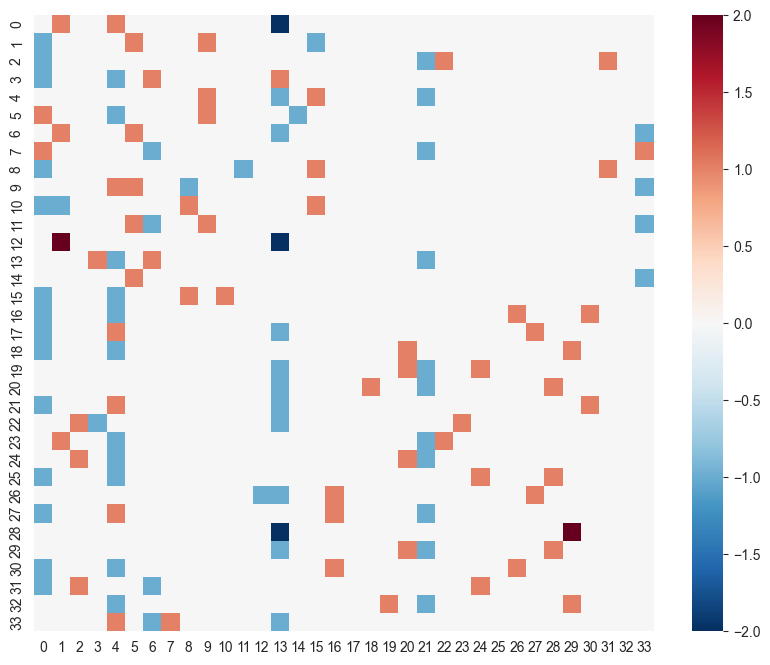

CPU times: user 2.47 s, sys: 89.8 ms, total: 2.56 s
Wall time: 2.69 s


In [9]:
%%time
# Visualisasi matriks

plt.figure(figsize=(10, 8))
sns.heatmap(sosiometri_matrix, cmap='RdBu_r')
plt.show()


In [10]:
%%time
# Standarisasi data

scaler = StandardScaler()
sosiometri_scaled = scaler.fit_transform(sosiometri_matrix)

CPU times: user 3.24 ms, sys: 1.28 ms, total: 4.52 ms
Wall time: 3.68 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super(

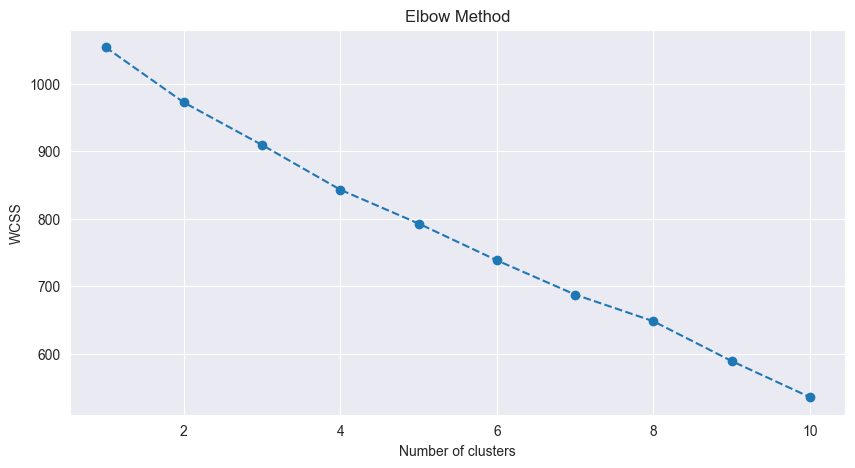

CPU times: user 3.31 s, sys: 396 ms, total: 3.71 s
Wall time: 1.42 s


In [11]:
%%time
# Menentukan jumlah klaster menggunakan metode Elbow

wcss = [] # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sosiometri_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
%%time
# Menerapkan K-Means Clustering

optimal_clusters = 2  # misalkan kita memilih 2 berdasarkan metode elbow

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_students = kmeans.fit_predict(sosiometri_scaled)


CPU times: user 107 ms, sys: 11.4 ms, total: 118 ms
Wall time: 36.7 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
%%time


print(len(df))
print(len(clustered_students))


34
34
CPU times: user 715 µs, sys: 247 µs, total: 962 µs
Wall time: 883 µs


In [14]:
%%time

cluster_df = pd.DataFrame({'Cluster': clustered_students})

# Concatenate the new DataFrame to the original DataFrame
df = pd.concat([df, cluster_df], axis=1)

# Check the result
print(df.head())

            Timestamp                   Email Address  \
0  5/11/2023 21:07:43           dewaanom712@gmail.com   
1   5/11/2023 8:52:17         bintanggek239@gmail.com   
2   5/7/2023 21:57:41      gustiayuritiyani@gmail.com   
3   5/7/2023 11:53:05        kusumawidya842@gmail.com   
4  6/20/2023 12:04:41  nikomangsulastriasih@gmail.com   

                   NAMA LENGKAP  NO ABSEN KELAS  \
0        Dewa Gede Anom Rahmadi         1  VIIF   
1     Dewa Gede Rama Carmandana         2  VIIF   
2           Gusti Ayu Riti Yani         3  VIIF   
3  I Gusti Made Adi Widyakusuma         4  VIIF   
4      I Gusti Ngurah Ito Wikma         5  VIIF   

  1. Teman anda yang paling anda sukai di kelas  \
0                     Dewa Gede Rama Carmandana   
1                          I Kadek Abdi Nugraha   
2                       Ni Komang Diyah Suciani   
3   I Kd.  Bagas Paksi Wahyu Sarjana Kesuma Adi   
4                          I Kadek Okta Saputra   

                                          A

In [15]:
# Drop duplicate values in the 'NAMA LENGKAP' column
df.drop_duplicates(subset='NAMA LENGKAP', keep='first', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the length after dropping duplicates
print(len(df))

# Cetak baris yang dihapus
removed_data = df[df.duplicated(subset='NAMA LENGKAP', keep='first')]
print(removed_data)

# Recreate DataFrame using unique values
unique_names_df = df.drop_duplicates(subset='NAMA LENGKAP', keep='first').copy()



34
Empty DataFrame
Columns: [Timestamp, Email Address, NAMA LENGKAP, NO ABSEN, KELAS, 1. Teman anda yang paling anda sukai di kelas, Alasan, 2. Teman anda yang paling anda sukai di kelas, ALASAN, 1. Teman anda yang paling anda tidak sukai di kelas, ALASAN.1, 2. Teman anda yang paling anda tidak sukai di kelas, ALASAN.2, Cluster]
Index: []


In [16]:
%%time
# Menambahkan hasil kluster ke dataframe awal

df['Cluster'] = clustered_students

CPU times: user 297 µs, sys: 49 µs, total: 346 µs
Wall time: 333 µs


In [17]:
%%time
# Analisis hasil klaster

print(df[df['Cluster'] == 0])  # misalnya, untuk melihat semua siswa di kluster 0


             Timestamp                       Email Address  \
0   5/11/2023 21:07:43               dewaanom712@gmail.com   
1    5/11/2023 8:52:17             bintanggek239@gmail.com   
4   6/20/2023 12:04:41      nikomangsulastriasih@gmail.com   
5    5/8/2023 17:57:04            kadeknugraha46@gmail.com   
6    5/7/2023 11:57:05                xzey.keren@gmail.com   
7   5/10/2023 19:27:39  ikadekcalvinradityaputra@gmail.com   
9    5/7/2023 12:29:32                 oktas9373@gmail.com   
11   5/16/2023 8:50:03      imadedenisdirgantara@gmail.com   
12   5/7/2023 11:51:44             youkowhanz123@gmail.com   
14   5/7/2023 11:51:25                dikayana43@gmail.com   
17   5/7/2023 12:01:44           amirapratiwi901@gmail.com   
21   5/7/2023 11:51:05             komangayumeli@gmail.com   
22   5/7/2023 12:00:36             diyahsuciani8@gmail.com   
26   5/7/2023 12:42:08          putuintandewanti@gmail.com   
27  6/20/2023 12:13:33      nikomangsulastriasih@gmail.com   
28    5/

In [18]:
%%time
# Inisiasi graf berarah

G = nx.DiGraph()

CPU times: user 70 µs, sys: 49 µs, total: 119 µs
Wall time: 127 µs


In [19]:
%%time
# eTambahkan node ke graf

for idx, row in df.iterrows():
    G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster'])


CPU times: user 9.72 ms, sys: 1.89 ms, total: 11.6 ms
Wall time: 12.1 ms


In [20]:
%%time
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

    # Teman yang tidak disukai
    if row['1. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

    if row['2. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)


CPU times: user 12.2 ms, sys: 440 µs, total: 12.6 ms
Wall time: 12.4 ms


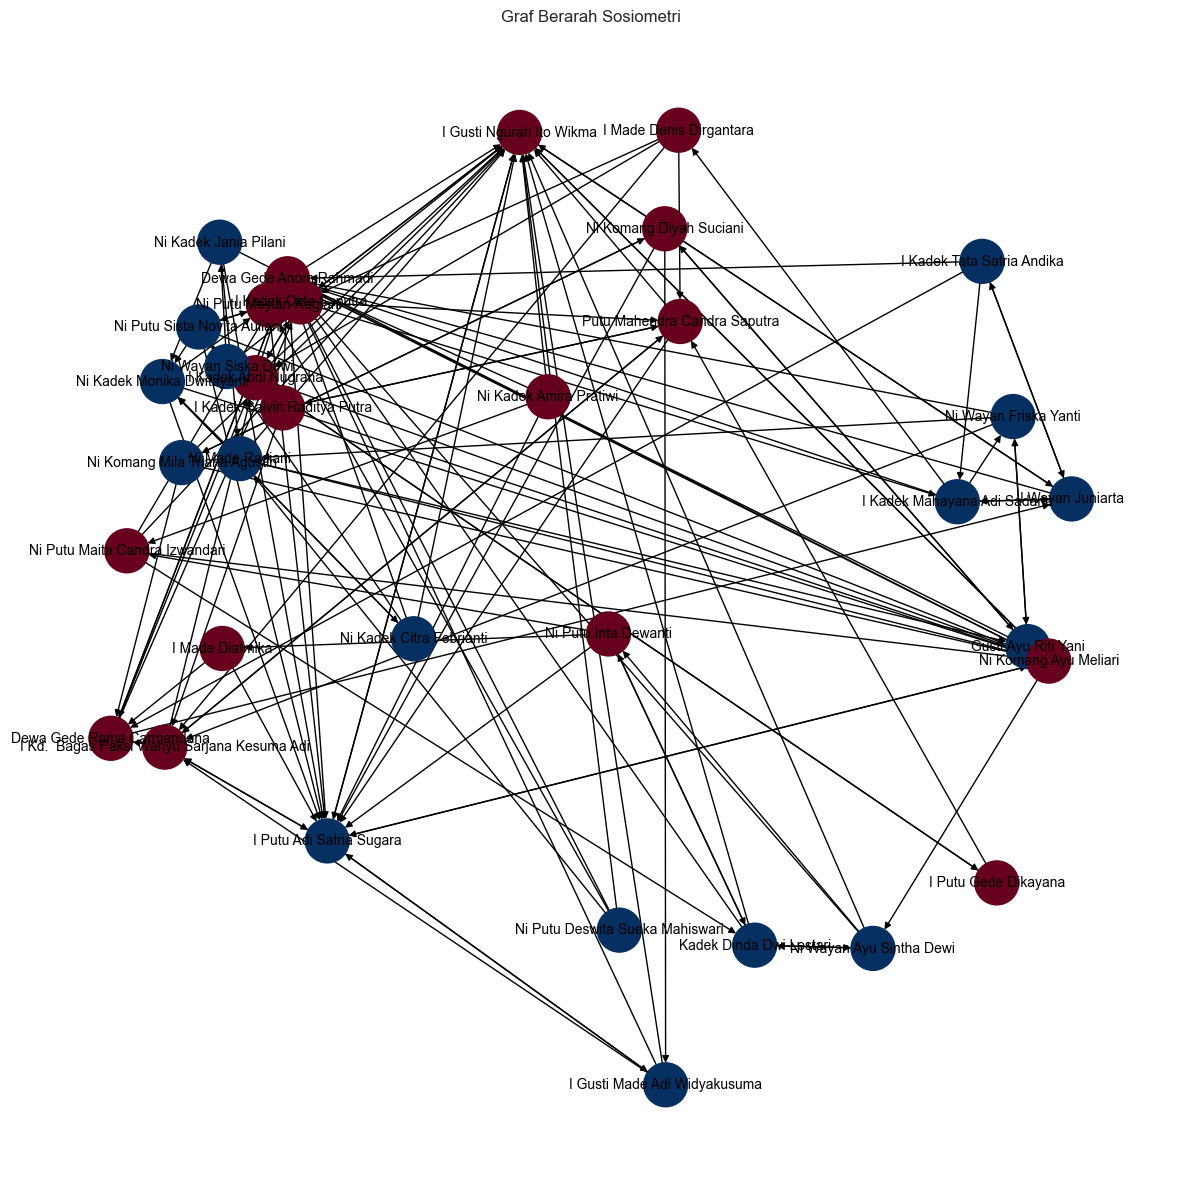

CPU times: user 5.05 s, sys: 302 ms, total: 5.35 s
Wall time: 9.03 s


In [21]:
%%time
# Visualisasi graf berarah

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(15, 15))

# Pilih warna berdasarkan kluster
colors = [node[1]['cluster'] for node in G.nodes(data=True)]

# Gambar graf pada axis yang diberikan
pos = nx.spring_layout(G)  # Kita bisa mencoba layout lain seperti: shell_layout, circular_layout, etc.
nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.RdBu, font_size=10, node_size=1000)

ax.set_title('Graf Berarah Sosiometri')
plt.show()

In [22]:
%%time
# Menghitung bobot untuk setiap Node

in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))


CPU times: user 382 µs, sys: 7 µs, total: 389 µs
Wall time: 401 µs


In [23]:
%%time
# Menambahkan bobot ke dataframe

df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees)
df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees)
df['total_degree'] = df['in_degree'] + df['out_degree']


CPU times: user 8.74 ms, sys: 2.49 ms, total: 11.2 ms
Wall time: 20.2 ms


In [24]:
%%time
# Analisis bobot

most_mentioned = df.sort_values(by='total_degree', ascending=False).head()
print("Siswa yang Paling Sering Disebutkan:")
print(most_mentioned)

least_mentioned = df.sort_values(by='total_degree').head()
print("\nSiswa yang Paling Jarang Disebutkan:")
print(least_mentioned)


Siswa yang Paling Sering Disebutkan:
            Timestamp               Email Address                NAMA LENGKAP  \
20  5/10/2023 9:40:19  monikadwitayanti@gmail.com  Ni Kadek Monika Dwitayanti   
9   5/7/2023 12:29:32         oktas9373@gmail.com        I Kadek Okta Saputra   
28   5/8/2023 8:20:35       ialitarpawa@gmail.com      Ni Putu Meylan Regiani   
2   5/7/2023 21:57:41  gustiayuritiyani@gmail.com         Gusti Ayu Riti Yani   
24  5/7/2023 11:52:45   nimaderadiani04@gmail.com             Ni Made Radiani   

    NO ABSEN KELAS 1. Teman anda yang paling anda sukai di kelas  \
20        21  VIIF                      Ni Kadek Citra Febrianti   
9         10  VIIF                      I Gusti Ngurah Ito Wikma   
28        29  VIIF                  Ni Putu Sista Novita Auliani   
2          3  VIIF                       Ni Komang Diyah Suciani   
24        25  VIIF                           Gusti Ayu Riti Yani   

                       Alasan 2. Teman anda yang paling anda sukai 

/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:763: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


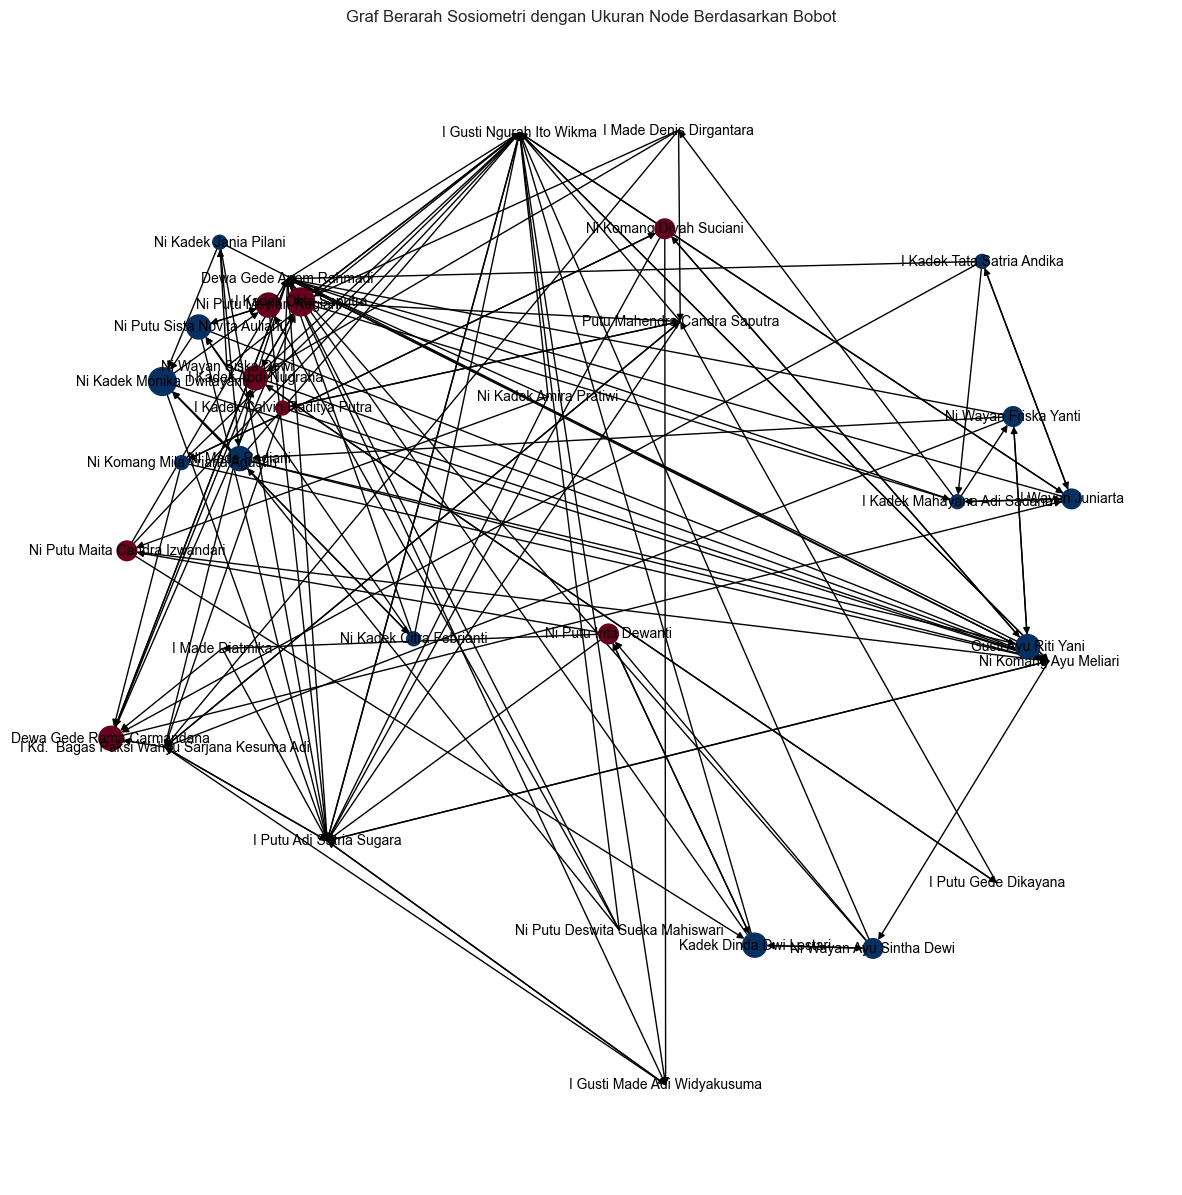

CPU times: user 3.83 s, sys: 259 ms, total: 4.09 s
Wall time: 8.56 s


In [25]:
%%time
# Visualisasi bobot

node_sizes = [in_degrees[node] * 100 for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 15))
node_sizes = [in_degrees[node] * 100 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=node_sizes, cmap=plt.cm.RdBu, font_size=10, ax=ax)
ax.set_title('Graf Berarah Sosiometri dengan Ukuran Node Berdasarkan Bobot')
plt.show()


In [26]:
%%time
# Implimentasi Algoritma Welch-Powell

def welch_powell(graph):
    color_map = {}
    colors = []

    # Urutkan simpul berdasarkan derajatnya
    nodes_sorted_by_degree = sorted(list(graph.nodes()), key=lambda x: len(list(graph.neighbors(x))), reverse=True)

    for node in nodes_sorted_by_degree:
        available_colors = [True] * len(graph)

        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                color = color_map[neighbor]
                available_colors[color] = False

        for color, available in enumerate(available_colors):
            if available:
                color_map[node] = color
                if color not in colors:
                    colors.append(color)
                break

    return color_map, len(colors)


CPU times: user 12 µs, sys: 3 µs, total: 15 µs
Wall time: 23.1 µs


In [27]:
%%time
# Menerapkan pewarnaan pada graf

color_map, num_colors = welch_powell(G)
colors = [color_map[node] for node in G.nodes()]


CPU times: user 930 µs, sys: 280 µs, total: 1.21 ms
Wall time: 11.6 ms


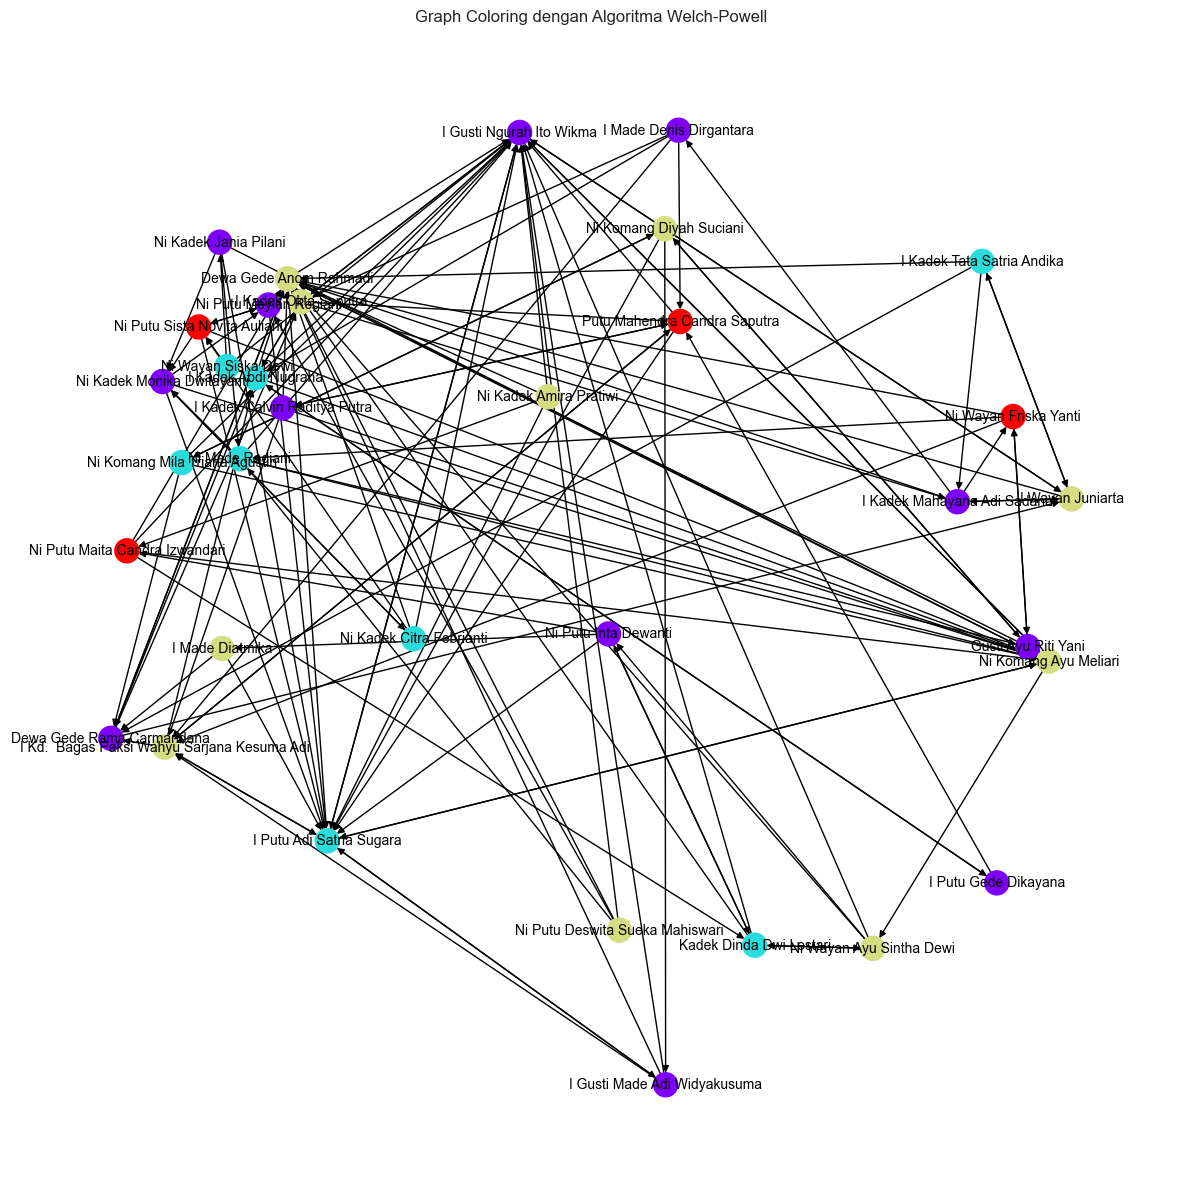

CPU times: user 5.71 s, sys: 294 ms, total: 6.01 s
Wall time: 20 s


In [28]:
%%time
# Visualisasi graf dengan pewarnaan

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, font_size=10, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')
plt.show()


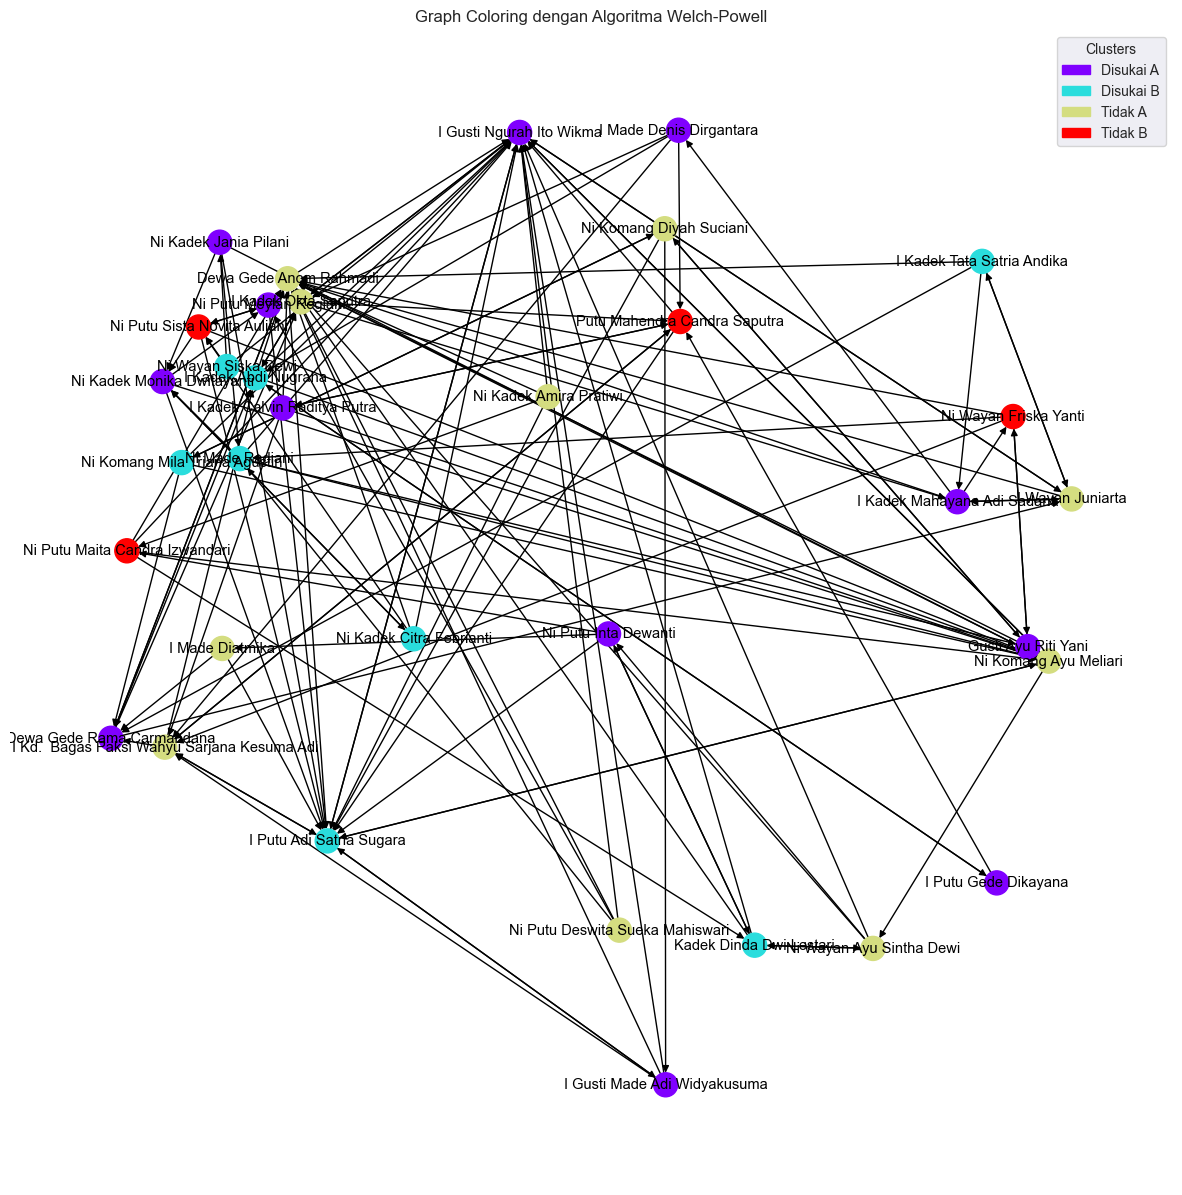

CPU times: user 10.7 s, sys: 661 ms, total: 11.3 s
Wall time: 23.9 s


In [29]:
%%time
cmap = plt.cm.rainbow
norm = plt.Normalize(0, num_colors-1)

normalized_colors = [cmap(norm(color)) for color in colors]

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, font_size=10.5, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')

# Membuat legenda berdasarkan pewarnaan yang unik dan mapping warnanya
custom_labels = ["Disukai A", "Disukai B", "Tidak A", "Tidak B"]
legend_labels = {color: f'Cluster {color+1}' for color in set(colors)}
# handles = [Patch(color=cmap(norm(color)), label=label) for color, label in legend_labels.items()]

# Membuat legenda berdasarkan pewarnaan yang unik
unique_colors = list(set(colors))
handles = [Patch(color=cmap(norm(color)), label=custom_labels[color]) for color in unique_colors]

ax.legend(handles=handles, title='Clusters')
plt.show()


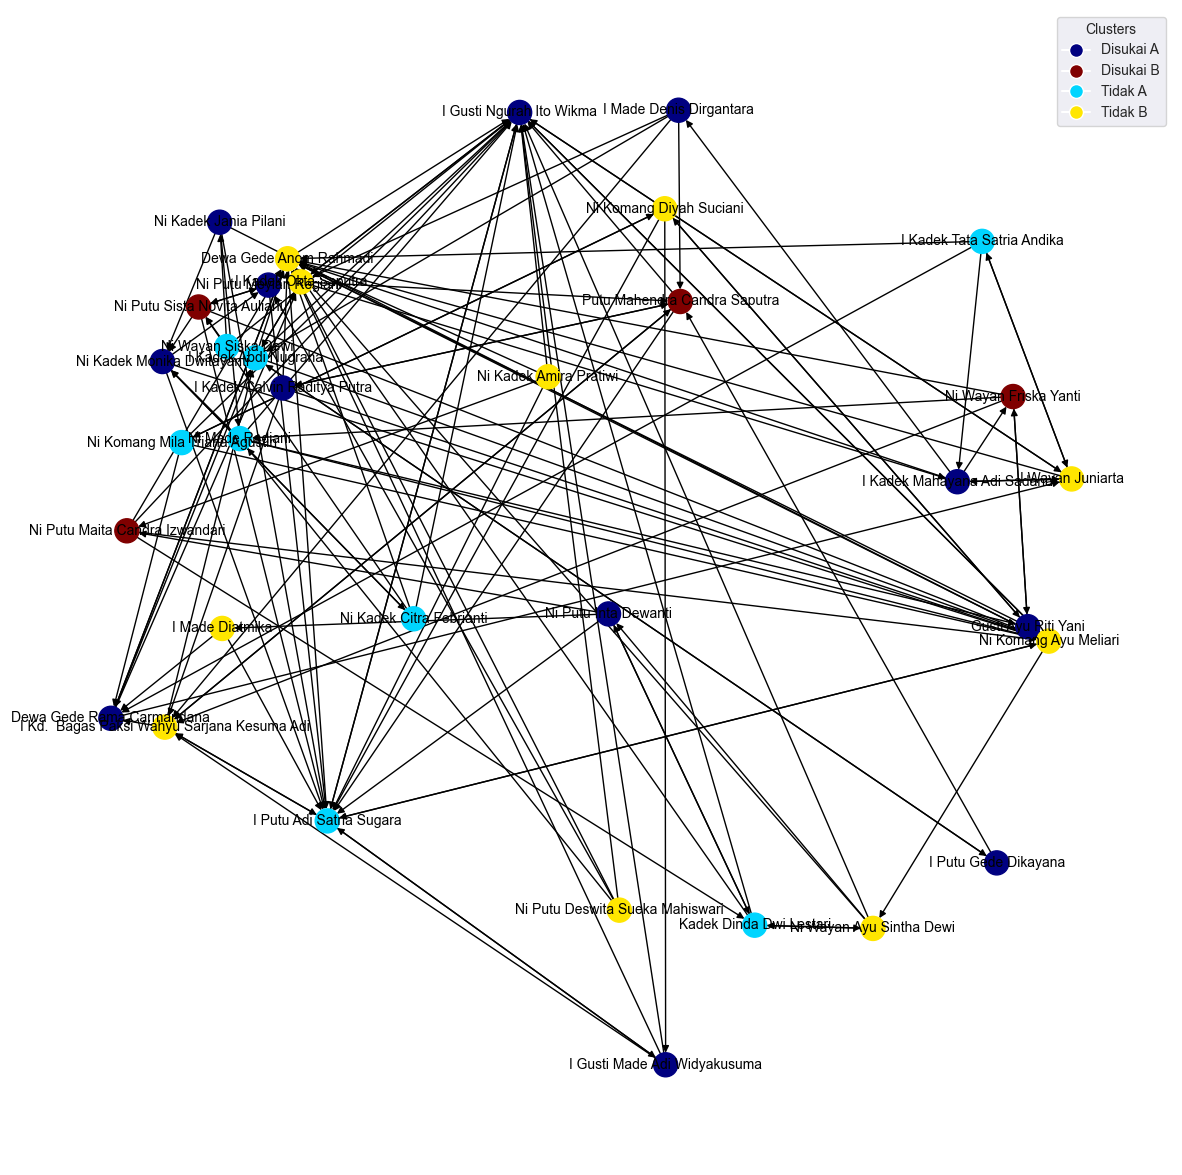

CPU times: user 8.65 s, sys: 455 ms, total: 9.11 s
Wall time: 11.1 s


In [30]:
%%time
# Ubah nilai numerik colors menjadi warna
cmap = plt.cm.jet  # Kita bisa mengganti jet dengan colormap lainnya yang Kita suka
max_value = max(colors)
min_value = min(colors)
norm = plt.Normalize(min_value, max_value)
mapped_colors = [cmap(norm(value)) for value in colors]

fig, ax = plt.subplots(figsize=(15, 15))

# Gambar graf dengan warna yang sudah di-mapped
nx.draw(G, pos, with_labels=True, node_color=mapped_colors, font_size=10, ax=ax)

# Buat legenda yang dinamis
unique_colors = list(set(mapped_colors))
handles = [plt.Line2D([0],
                      [0],
                      marker='o',
                      color='w',
                      label=custom_labels[color_group],
                      markersize=10,
                      markerfacecolor=color) for color_group, color in zip(set(colors),
                                                                           unique_colors)]

ax.legend(handles=handles, title="Clusters")

plt.show()

In [31]:
file_path = "./sociometryclustering/Processed Data F.csv"
df = pd.read_csv(file_path)
df

,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/11/2023 21:07:43,dewaanom712@gmail.com,Dewa Gede Anom Rahmadi,1,VIIF,Dewa Gede Rama Carmandana,Karena baik,I Gusti Ngurah Ito Wikma,Karena baik,I Putu Adi Satria Sugara,Karena suka mencari masalah,I Putu Adi Satria Sugara,"Karena suka mencari masalah Sama teman"""
1,5/11/2023 8:52:17,bintanggek239@gmail.com,Dewa Gede Rama Carmandana,2,VIIF,I Kadek Abdi Nugraha,Karena lucu,I Kadek Okta Saputra,Karena baik,Dewa Gede Anom Rahmadi,Karena suka mengejek,I Wayan Juniarta,Karena sombong
2,5/7/2023 21:57:41,gustiayuritiyani@gmail.com,Gusti Ayu Riti Yani,3,VIIF,Ni Komang Diyah Suciani,"Baik,sering saling curhat",Ni Wayan Friska Yanti,"Baik,asik kalo di ajak cerita",Dewa Gede Anom Rahmadi,Sok asik,Ni Komang Ayu Meliari,"Ribut,kalo ngomong keras banget"
3,5/7/2023 11:53:05,kusumawidya842@gmail.com,I Gusti Made Adi Widyakusuma,4,VIIF,I Kd. Bagas Paksi Wahyu Sarjana Kesuma Adi,Baik ramah dan bisa di ajak bercanda\n,I Putu Adi Satria Sugara,Baik sopan dan ramah,I Gusti Ngurah Ito Wikma,Karna suka mengejek saya dan suka memerintah,Dewa Gede Anom Rahmadi,Jika di ajak ngobrol dia tidak mau dan pemarah
4,6/20/2023 12:04:41,nikomangsulastriasih@gmail.com,I Gusti Ngurah Ito Wikma,5,VIIF,I Kadek Okta Saputra,sering kerja sama dan suka meminjamkan pulpen,I Wayan Juniarta,sering kerja sama dan sering ngasih nyontek,I Putu Adi Satria Sugara,sering ngamuk gak jelas,Ni Komang Ayu Meliari,caper sana sini
5,5/8/2023 17:57:04,kadeknugraha46@gmail.com,I Kadek Abdi Nugraha,6,VIIF,I Kadek Okta Saputra,Karena dia baik,Dewa Gede Anom Rahmadi,Dia suka membantu,I Putu Gede Dikayana,Karena nggak mau barisan paling depan,I Gusti Ngurah Ito Wikma,Selalu mengejek nama orang tua
6,5/7/2023 11:57:05,xzey.keren@gmail.com,I Kd. Bagas Paksi Wahyu Sarjana Kesuma Adi,7,VIIF,Dewa Gede Rama Carmandana,𝐎𝐫𝐚𝐧𝐠𝐧𝐲𝐚 𝐀𝐬𝐢𝐤,I Kadek Abdi Nugraha,𝐎𝐫𝐚𝐧𝐠𝐧𝐲𝐚 𝐀𝐬𝐢𝐤,I Putu Adi Satria Sugara,𝐊𝐚𝐝𝐚𝐧𝐠-𝐤𝐚𝐝𝐚𝐧𝐠,Putu Mahendra Candra Saputra,𝐊𝐚𝐝𝐚𝐧𝐠-𝐤𝐚𝐝𝐚𝐧𝐠
7,5/10/2023 19:27:39,ikadekcalvinradityaputra@gmail.com,I Kadek Calvin Raditya Putra,8,VIIF,Putu Mahendra Candra Saputra,Karena lucu,Dewa Gede Anom Rahmadi,Suka bermain,I Kd. Bagas Paksi Wahyu Sarjana Kesuma Adi,Karena bauu,Ni Komang Ayu Meliari,Karena cerewet
8,5/7/2023 14:48:33,rc9320348@gmail.com,I Kadek Mahayana Adi Sadana,9,VIIF,Ni Wayan Friska Yanti,Tidak lebay,I Wayan Juniarta,Karena Siring kasih jawaban,Dewa Gede Anom Rahmadi,Suka ngejek orang tua,I Made Denis Dirgantara,Tengal Juari
9,5/7/2023 12:29:32,oktas9373@gmail.com,I Kadek Okta Saputra,10,VIIF,I Gusti Ngurah Ito Wikma,Dadi ajk mecande,I Kadek Abdi Nugraha,Seru ajk mecande,Putu Mahendra Candra Saputra,Sai nguwalek,I Kadek Mahayana Adi Sadana,Ajum


In [32]:
# Gabungkan kolom teman yang disukai dan tidak disukai menjadi satu DataFrame baru
df_teman_sukai = pd.concat([df['1. Teman anda yang paling anda sukai di kelas'], df['2. Teman anda yang paling anda sukai di kelas']],ignore_index=True).dropna()

df_teman_tidak_sukai = pd.concat([df['1. Teman anda yang paling anda tidak sukai di kelas'], df['2. Teman anda yang paling anda tidak sukai di kelas']],ignore_index=True).dropna()

# Bersihkan dan normalisasi data
df_teman_y = df_teman_sukai.str.strip()
df_teman_x = df_teman_tidak_sukai.str.strip()

# Ganti NaN dengan string kosong ('') sebelum menghitung frekuensi
df_teman_y = df_teman_y.fillna('')
df_teman_x = df_teman_x.fillna('')

# Hitung frekuensi kemunculan teman yang disukai dan tidak disukai
frekuensi_disukai = df_teman_y.value_counts().astype(float)
frekuensi_tidak_disukai = df_teman_x.value_counts().astype(float)

# Buat DataFrame kesimpulan
df_kesimpulan = pd.merge(pd.DataFrame({'Nama siswa/i yang disukai': frekuensi_disukai.index,
                                       'Frekuensi disukai': frekuensi_disukai.values}),
                         pd.DataFrame({'Nama siswa/i yang tidak disukai': frekuensi_tidak_disukai.index,
                                       'Frekuensi tidak disukai': frekuensi_tidak_disukai.values}),
                         how='outer',
                         left_index=True,
                         right_index=True)

# Tampilkan DataFrame kesimpulan
df_kesimpulan

,Nama siswa/i yang disukai,Frekuensi disukai,Nama siswa/i yang tidak disukai,Frekuensi tidak disukai
0,I Gusti Ngurah Ito Wikma,6.0,I Putu Adi Satria Sugara,16.0
1,I Kadek Abdi Nugraha,6.0,Dewa Gede Anom Rahmadi,14.0
2,Dewa Gede Rama Carmandana,5.0,I Gusti Ngurah Ito Wikma,11.0
3,Ni Kadek Monika Dwitayanti,4.0,Ni Komang Ayu Meliari,11.0
4,Ni Putu Sista Novita Auliani,4.0,I Kd. Bagas Paksi Wahyu Sarjana Kesuma Adi,4.0
5,I Kadek Okta Saputra,4.0,Putu Mahendra Candra Saputra,4.0
6,Ni Made Radiani,3.0,I Putu Gede Dikayana,1.0
7,Kadek Dinda Dwi Lestari,3.0,I Wayan Juniarta,1.0
8,Ni Putu Meylan Regiani,3.0,I Made Denis Dirgantara,1.0
9,I Wayan Juniarta,3.0,I Kadek Mahayana Adi Sadana,1.0
